<a href="https://colab.research.google.com/github/Seohyun29/Depression-Detection/blob/main/total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 우울증_P344_no_silence.wav to 우울증_P344_no_silence.wav
/content/drive/MyDrive/토탈/음성데이터/우울증_P344_no_silence.wav


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4363 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4527 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4467 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 4540 missing from current font.
  font.set_text(s

비우울증입니다.


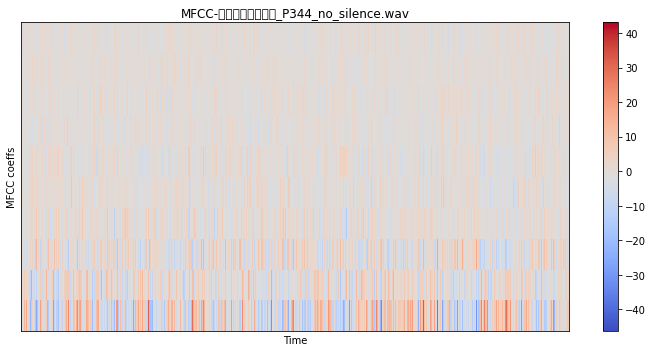

In [ ]:
import os
from google.colab import files

os.chdir('/content/drive/MyDrive/토탈/음성데이터')
uploaded = files.upload()

#mfcc
import matplotlib.pyplot as plt
import librosa.display
import librosa
import numpy as np

import os
from scipy.io import wavfile

path1 = '/content/drive/MyDrive/토탈/음성데이터'

file_list = os.listdir(path1)
file_list_wav = [file for file in file_list if file.endswith(".wav")]
for file in file_list_wav:
    filepath = path1 + '/' + file
    sample_rate=16000
    print(filepath)

    x = librosa.load(filepath,sample_rate)[0]
    S = librosa.feature.melspectrogram(x, sr=sample_rate, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=10)

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)

    plt.figure(figsize=(10,5))
    librosa.display.specshow(delta2_mfcc)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title('MFCC-%s'%file)
    plt.colorbar()
    plt.tight_layout()
    os.chdir('/content/drive/MyDrive/토탈/totlatest')
    plt.savefig('mfcc-음성1')
os.remove(filepath)

#우울증 판별
import numpy as np
from google.colab import files
from keras.preprocessing import image

path2= '/content/drive/MyDrive/토탈/totlatest/mfcc-음성1.png'

img=image.load_img(path2, target_size=(150, 150))

x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)


if classes[0]>0:
    print(" 우울증 위험입니다.")
else:
    print("비우울증입니다.")
os.remove(path2)

In [ ]:
import os
from google.colab import files

os.chdir('/content/drive/MyDrive/토탈/음성데이터')
uploaded = files.upload()

In [ ]:
# 기본 경로
import os
base_dir = '/content/drive/MyDrive/cnn테스트'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# 훈련에 사용되는 이미지 경로
train_depression_dir = os.path.join(train_dir, '우울증')
train_Ndepression_dir = os.path.join(train_dir, '비우울증')

# 테스트에 사용되는 이미지 경로
validation_depression_dir = os.path.join(validation_dir, '우울증')
validation_Ndepression_dir = os.path.join(validation_dir, '비우울증')

In [ ]:
print('Total training depression images :', len(os.listdir(train_depression_dir)))
print('Total training Ndepression images :', len(os.listdir(train_Ndepression_dir)))

print('Total validation depression images :', len(os.listdir(validation_depression_dir)))
print('Total validation Ndepression images :', len(os.listdir(validation_Ndepression_dir)))

Total training depression images : 39
Total training Ndepression images : 93
Total validation depression images : 16
Total validation Ndepression images : 40


In [ ]:
#모델 구성하기
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
#모델컴파일하기
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.0001),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

In [ ]:
#이미지 전처리
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  batch_size=20,
                                                  class_mode='binary',
                                                  target_size=(150,150))
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size=(150,150))

Found 132 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=6,
                    epochs=100,
                    validation_steps=50,
                    verbose=2)


Epoch 1/100
6/6 - 2s - loss: 0.4332 - accuracy: 0.7946 - val_loss: 0.6552 - val_accuracy: 0.7321 - 2s/epoch - 257ms/step
Epoch 2/100
6/6 - 1s - loss: 0.4306 - accuracy: 0.7768 - 887ms/epoch - 148ms/step
Epoch 3/100
6/6 - 1s - loss: 0.4247 - accuracy: 0.8125 - 896ms/epoch - 149ms/step
Epoch 4/100
6/6 - 1s - loss: 0.4263 - accuracy: 0.8304 - 897ms/epoch - 149ms/step
Epoch 5/100
6/6 - 1s - loss: 0.3950 - accuracy: 0.7946 - 880ms/epoch - 147ms/step
Epoch 6/100
6/6 - 1s - loss: 0.4021 - accuracy: 0.8500 - 936ms/epoch - 156ms/step
Epoch 7/100
6/6 - 1s - loss: 0.4222 - accuracy: 0.8036 - 871ms/epoch - 145ms/step
Epoch 8/100
6/6 - 1s - loss: 0.4155 - accuracy: 0.7857 - 883ms/epoch - 147ms/step
Epoch 9/100
6/6 - 1s - loss: 0.3988 - accuracy: 0.8571 - 888ms/epoch - 148ms/step
Epoch 10/100
6/6 - 1s - loss: 0.4128 - accuracy: 0.8214 - 892ms/epoch - 149ms/step
Epoch 11/100
6/6 - 1s - loss: 0.3836 - accuracy: 0.8393 - 896ms/epoch - 149ms/step
Epoch 12/100
6/6 - 1s - loss: 0.3847 - accuracy: 0.8304 -